# Gradient Descent
### This notebook demonstrates gradient descent for linear regression using cost and gradient functions.

In [22]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

## Training Data 
Defines the training dataset used to teach model whole over the notebook.

In [23]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

## Cost Function
This function calculates the mean squared error between model predictions and actual values, Cost in ML terms.

In [24]:
def compute_cost(x, y, w, b):
    m = x.shape[0]

    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i]) **2

    total_cost = cost/(2*m)

    return total_cost

## Gradient Function
This function calculates the gradients `(dj_dw and dj_db)` for linear regression. Basically using both of the below equations to compute gradients.

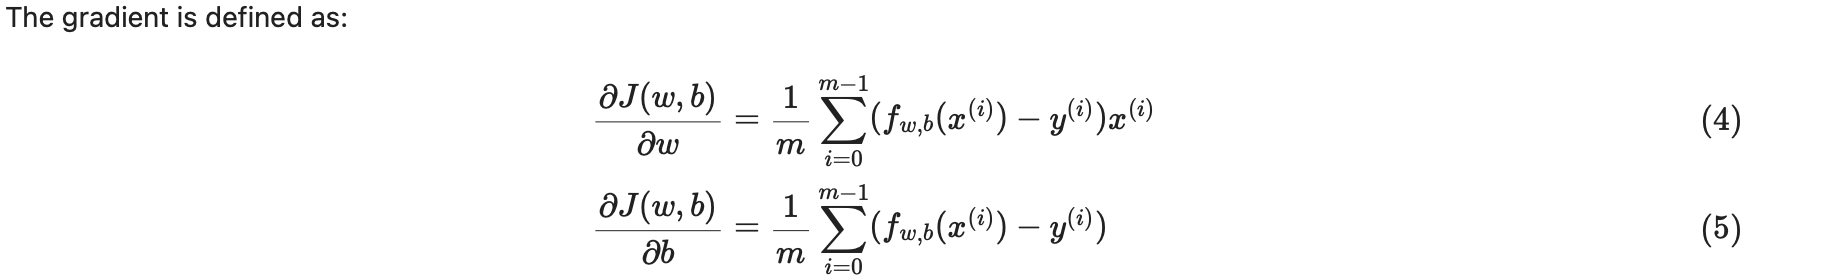

In [25]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db    

## Visual representation of gradients
Below are the graphs of Cost vs w, that shows slope of the curve at different values of w; b set to 100. You can visualize how the cost changes when b is set to 100 and w varies. At three different values of w, we get different slopes, like at w<200, we get a negative slope, it means we'll get minima at higher value of w, and at w>200, we get a positive slopes, gives us idea that the minima is at lower value of w. The position at which minima lies is the w where our cost(error) is minimum.

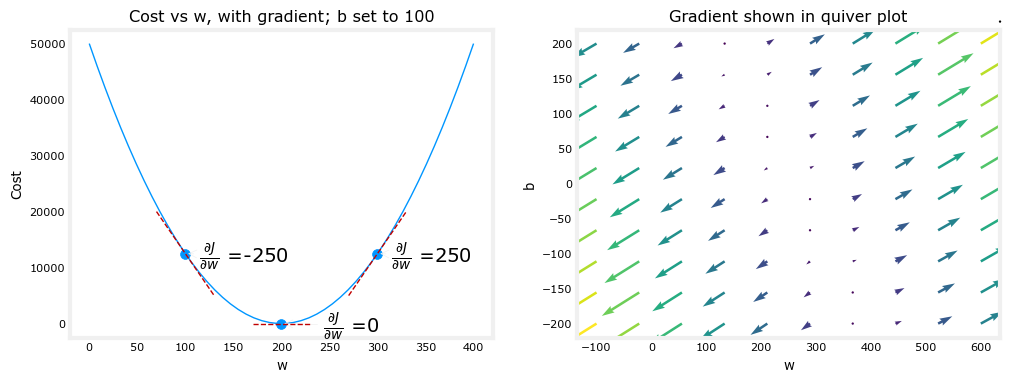

In [26]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

## Gradient Descent
The `gradient_descent` function is a generic implementation of the gradient descent optimization algorithm,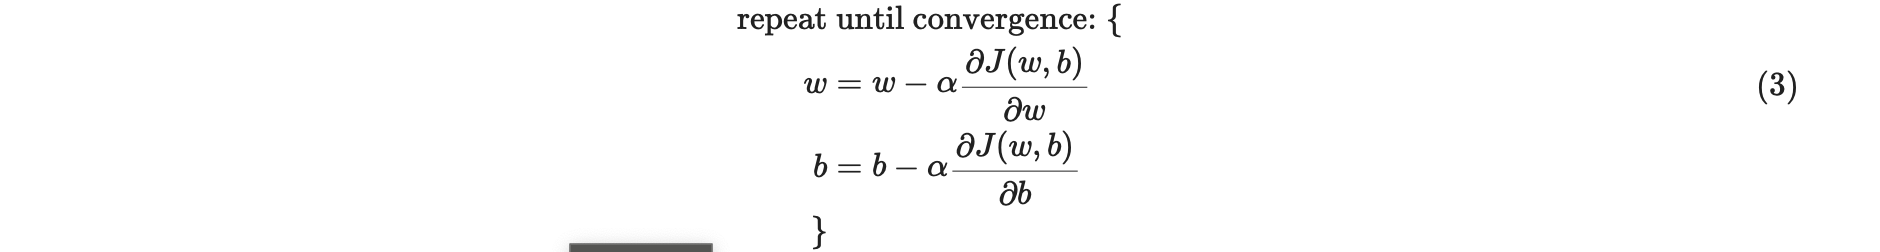 used to minimize cost function in machine learning models. It iteratively updates the model parameters (`w` and `b`) to reduce the error between predictions and actual target values. It will also log the cost and `[w,b]` for every 10% of the total iterations to save space and memory.

In [27]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, cost_function, gradient_function):
    """
    Params:

      x : Training Data Features
      y : Target from the training data
      w_in, b_in (scalar) : Initial values of w and b (model params)

      alpha(float) : Learning rate
      num_iterations(int) : Number of steps(iterations) to run gradient descent

      cost_function : Function to call that compute total cost
      gradient_function : Function to call that compute gradient

    Returns:
    
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (list): History of cost values
      p_history (list): History of parameters [w,b] 
    """

    w = copy.deepcopy(w_in) # avoid modifying global w_in

    #Arrays to store the values of cost and [w,b] for each iteration
    J_history = []
    P_history = []

    w = w_in
    b = b_in

    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i<100000:  #This limits the amount of memory used for storing history, which is important for large numbers of iterations.
            J_history.append(cost_function(x, y, w, b))
            P_history.append([w, b])

        #This prints progress every 10% of the total iterations, using formatted strings for readability. The use of `math.ceil` ensures at least one log even for small iteration counts.
        if i % math.ceil(num_iterations/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ", f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ", f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, P_history

## Getting optimized values of `w` and `b` 
Since we've done all the complex and algorithmic part now let's use the gradient descent algorithm to get optimized values of `w` and `b`.
We'll be providing it necessary parameters, like number of iterations, learning rate (alpha), initial `w` and initial `b`(these could be anything, or nearer the values of w and b you think).

In [28]:
w_init = 500
b_init = 200

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.52e+05  dj_dw:  9.000e+02, dj_db:  5.500e+02   w:  4.910e+02, b: 1.94500e+02
Iteration 1000: Cost 4.47e+01  dj_dw:  1.343e+00, dj_db: -2.173e+00   w:  2.184e+02, b: 7.02309e+01
Iteration 2000: Cost 1.04e+01  dj_dw:  6.474e-01, dj_db: -1.048e+00   w:  2.089e+02, b: 8.56505e+01
Iteration 3000: Cost 2.41e+00  dj_dw:  3.121e-01, dj_db: -5.049e-01   w:  2.043e+02, b: 9.30832e+01
Iteration 4000: Cost 5.60e-01  dj_dw:  1.504e-01, dj_db: -2.434e-01   w:  2.021e+02, b: 9.66659e+01
Iteration 5000: Cost 1.30e-01  dj_dw:  7.251e-02, dj_db: -1.173e-01   w:  2.010e+02, b: 9.83929e+01
Iteration 6000: Cost 3.03e-02  dj_dw:  3.495e-02, dj_db: -5.655e-02   w:  2.005e+02, b: 9.92253e+01
Iteration 7000: Cost 7.03e-03  dj_dw:  1.685e-02, dj_db: -2.726e-02   w:  2.002e+02, b: 9.96266e+01
Iteration 8000: Cost 1.63e-03  dj_dw:  8.121e-03, dj_db: -1.314e-02   w:  2.001e+02, b: 9.98200e+01
Iteration 9000: Cost 3.79e-04  dj_dw:  3.915e-03, dj_db: -6.334e-03   w:  2.001e+02, b: 9.99132e+01


## Cost versus iterations of gradient descent

A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

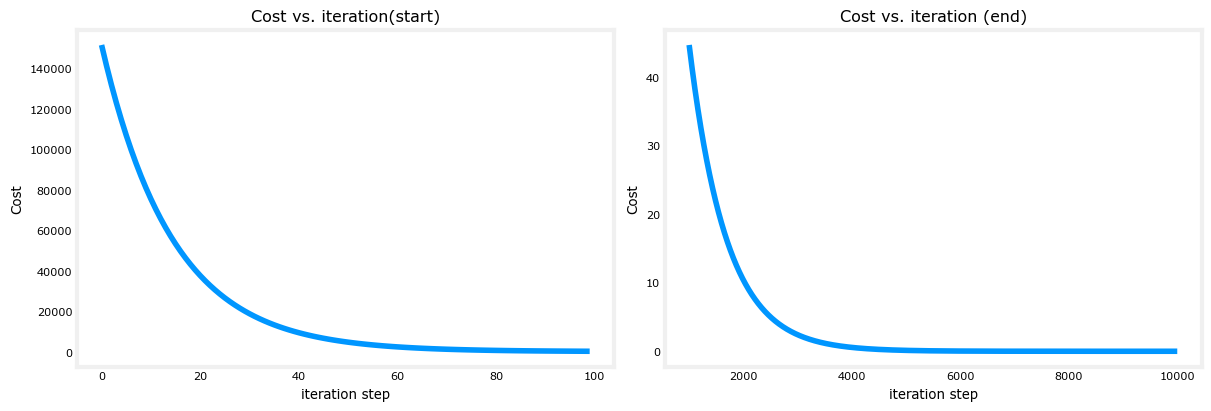

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Predictions

Now that we've discovered the optimal values for the parameters and we can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [30]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1800 sqft house prediction {w_final*1.8 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1800 sqft house prediction 460.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


## Visual representation of Gradient descent

We can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).


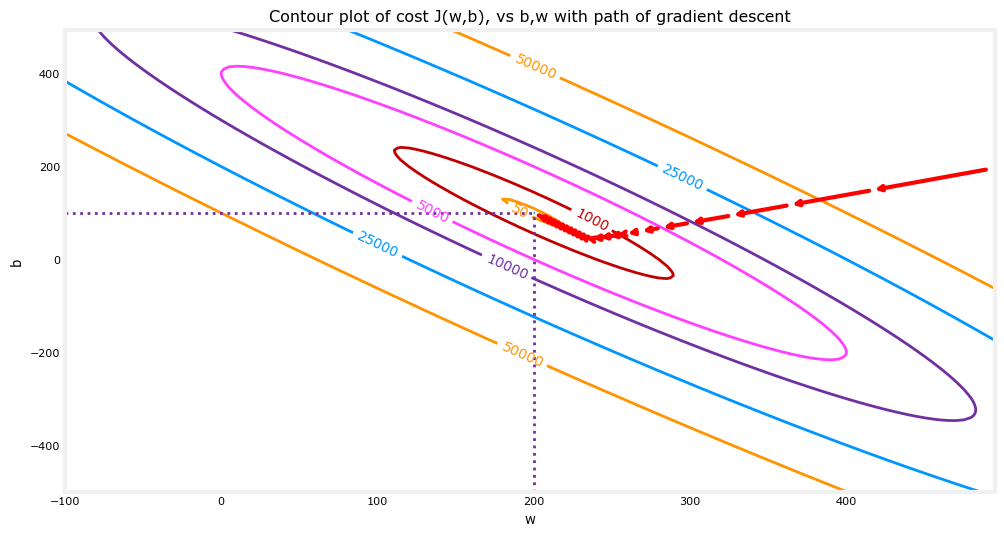

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

## Visual representation

This is to show the zoomed version of the above plot, to help understand things better.

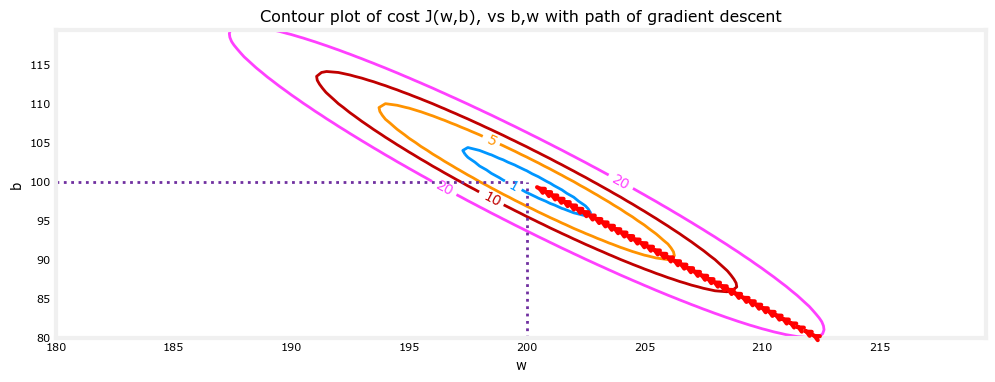

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

## Testing gradient descent with higher learning rate

Till now we've seen and even used the model to get optimum values of `w` and `b`, but we've used a good learning rate, now let's see the consequences of using high learning rate, our gradient descent will diverge instead of converging.

In [37]:
# initialize parameters
w_init = 0
b_init = 0

iterations = 10 #Lower iterations
tmp_alpha = 8.0e-1 #Higher learning rate
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


## Cost versus iterations of gradient descent (higher learning rate)

With a higher learning rate, the cost function often fails to decrease smoothly. Instead, it may oscillate or even increase, indicating unstable updates and poor convergence. 

A high learning rate can cause the cost to fluctuate or rise, preventing the model from converging. Reducing the learning rate usually restores stable and consistent decrease in cost.

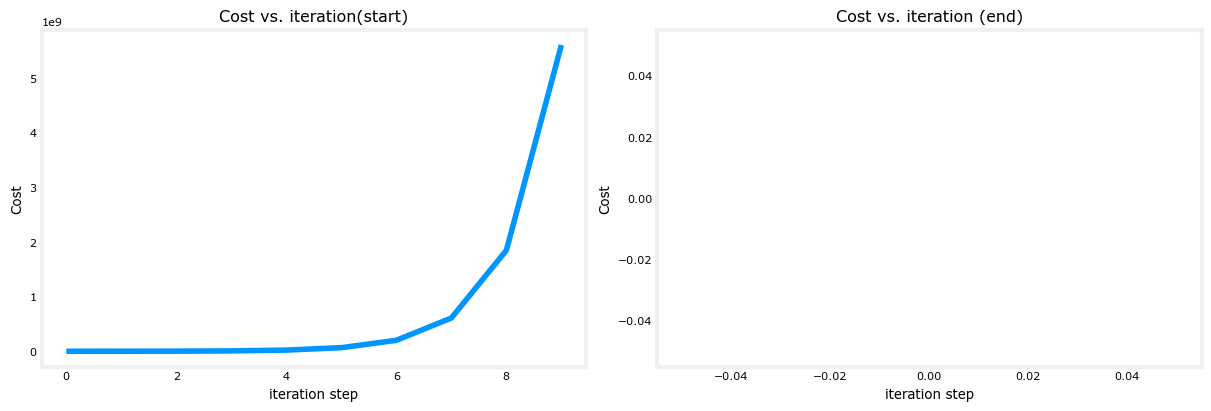

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

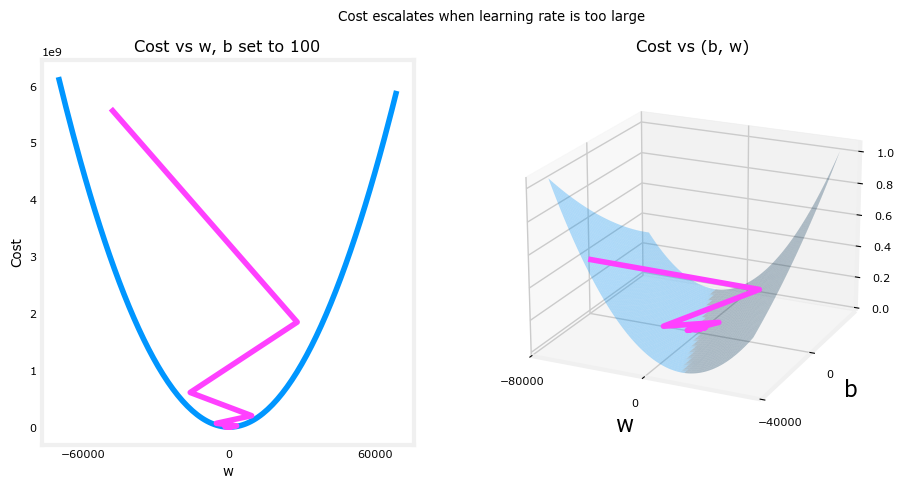

In [36]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()